<a href="https://colab.research.google.com/github/JohanvandenHeuvel/implementations/blob/main/KNearestNeighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def generate_data(mean=[0, 0], cov=np.identity(2), size=1, num_gaussians=10):
  """
  Generate data from a gaussian mixture with uniform probability
  """

  means = np.random.multivariate_normal(mean=mean, cov=cov, size=num_gaussians)

  data = []
  for i in range(size):
    mean = means[np.random.choice(np.arange(num_gaussians))]
    data.append(np.random.multivariate_normal(mean=mean, cov=cov/5))

  return np.array(data)

In [3]:
I = np.identity(2)
classA = generate_data(mean=[1,0], cov=I, size=100)
classB = generate_data(mean=[0,1], cov=I, size=100)

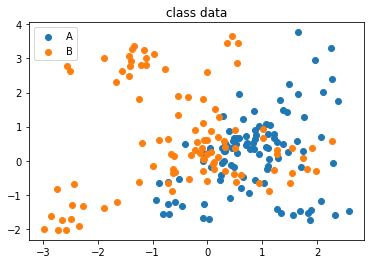

In [4]:
plt.scatter(x = classA.T[0], y = classA.T[1], label="A")
plt.scatter(x = classB.T[0], y = classB.T[1], label="B")
plt.legend()
plt.title("class data")
plt.show()

In [5]:
x_train = np.vstack((classA, classB))
y_train = np.hstack((np.zeros(shape=len(classA)), np.ones(shape=len(classB))))

In [6]:
def k_nearest_neighbors(x_i, x, y, k):
  distance = np.linalg.norm(x_i - x, 2, axis=1)
  idx = np.argpartition(distance, k)[:k]
  return np.mean(y[idx])

In [7]:
classA_test = generate_data(mean=[1,0], cov=I, size=10**4)
classB_test = generate_data(mean=[0,1], cov=I, size=10**4)

x_test = np.vstack((classA_test, classB_test))
y_test = np.hstack((np.zeros(shape=len(classA_test)), np.ones(shape=len(classB_test))))

In [13]:
k_list = [100, 80, 65, 45, 35, 25, 20, 15, 10, 5, 3, 1]

In [8]:
# do k_nearest_neighbors using the train set and evaluate on test set
train_losses = []
for k in k_list:
  y_hat = [k_nearest_neighbors(x_i, x_train, y_train, k) for x_i in x_test]
  loss = np.mean(np.power(y_test - y_hat, 2))
  train_losses.append(loss)

In [9]:
# do k_nearest_neighbors using the test set and evaluate on test set
test_losses = []
for k in k_list:
  y_hat = [k_nearest_neighbors(x_i, x_test, y_test, k) for x_i in x_test]
  loss = np.mean(np.power(y_test - y_hat, 2))
  test_losses.append(loss)

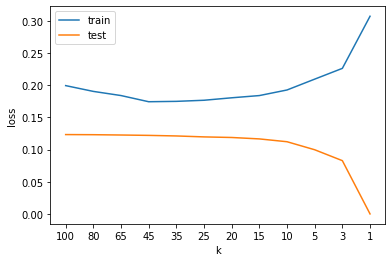

In [15]:
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.ylabel("loss")
plt.xlabel("k")
plt.xticks(np.arange(len(k_list)), labels=k_list)
plt.legend()
plt.show()